Saving traffic.csv to traffic.csv
Shape: (226278, 9)
Date Range: 2021-08-19 00:00:00 to 2021-08-25 00:00:00

Missing Values:
event         0
date          0
country      11
city         11
artist       37
album         5
track         5
isrc       7121
linkid        0
dtype: int64


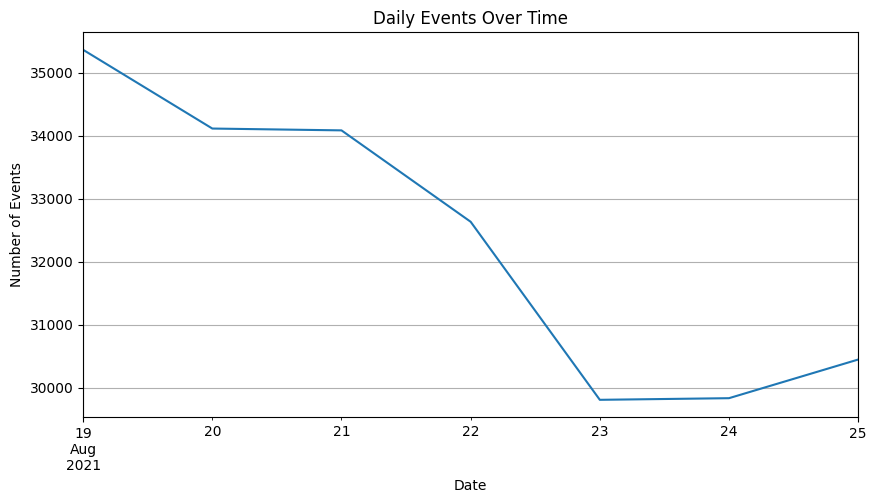

/tmp/ipython-input-1-659258543.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='Blues_d')


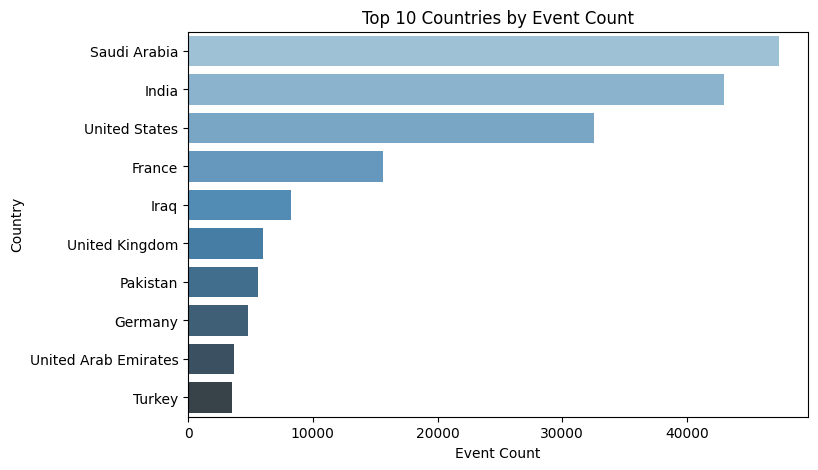

/tmp/ipython-input-1-659258543.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette='Purples')


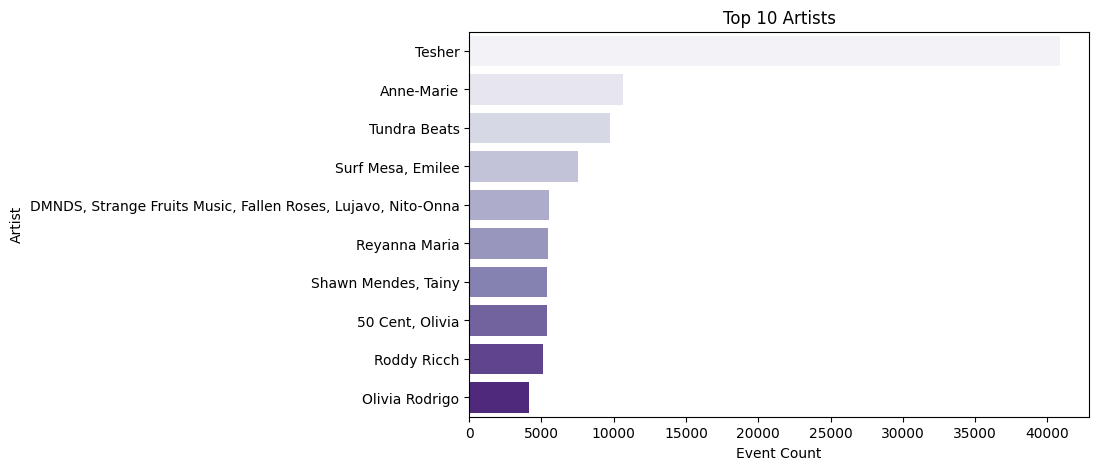

/tmp/ipython-input-1-659258543.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_tracks.values, y=top_tracks.index, palette='Greens')


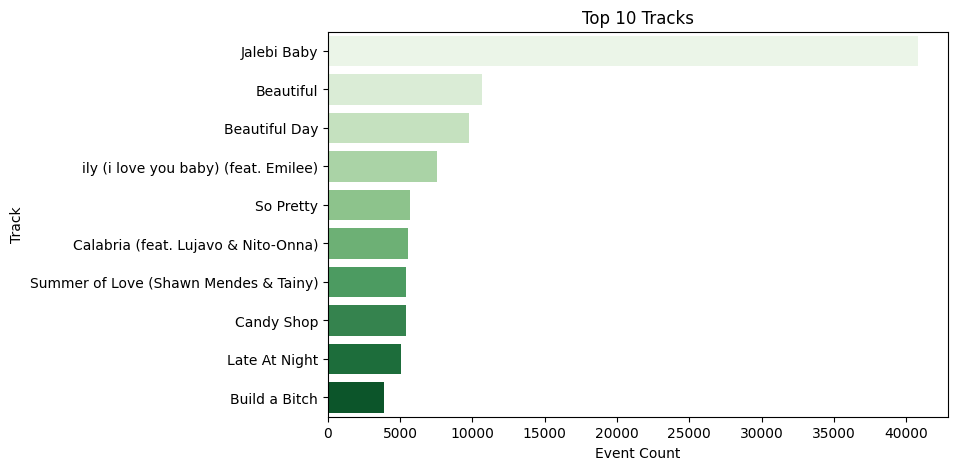

/tmp/ipython-input-1-659258543.py:68: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_counts = df.set_index('date').resample('M').size()
/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:1561: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


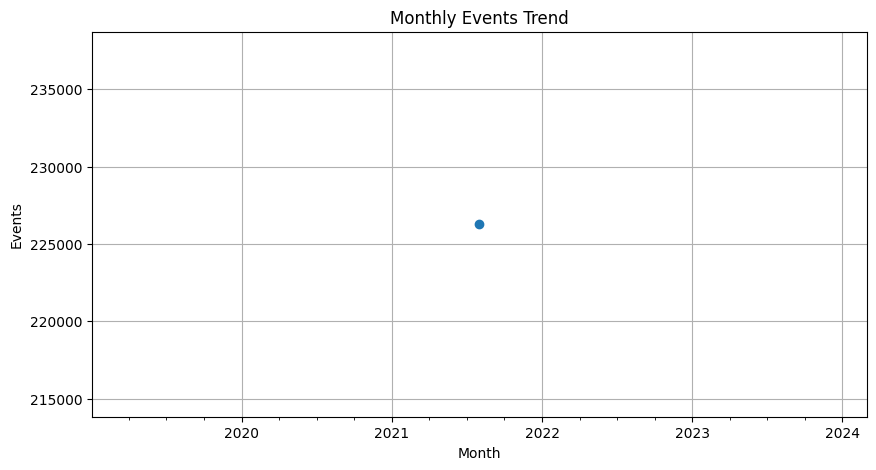

,Metric,Value
0,Total Events,226278
1,Unique Countries,211
2,Unique Cities,11993
3,Unique Artists,2419
4,Unique Tracks,3562
5,Unique Links,3839
6,Date Range Start,2021-08-19 00:00:00
7,Date Range End,2021-08-25 00:00:00


In [1]:
# 🌐 Website Traffic Analysis
# Project Summary:
# - Analyzing website traffic data to uncover user engagement trends, popular content, and geographic distribution.
# - Visualized trends across time, country, artist, and track to inform product or promotional decisions.

# 📦 Install Required Packages (skip if already installed)
!pip install pandas matplotlib seaborn --quiet

# 📚 Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import files

# 📁 Upload the CSV file
uploaded = files.upload()

# 📄 Load and clean the data
df = pd.read_csv('traffic.csv')
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.head()

# 📊 Basic Summary
print('Shape:', df.shape)
print('Date Range:', df['date'].min(), 'to', df['date'].max())
print('\nMissing Values:')
print(df.isna().sum())

# 📈 Daily Event Volume
daily_counts = df.groupby('date').size()
plt.figure(figsize=(10,5))
daily_counts.plot()
plt.title('Daily Events Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.grid(True)
plt.show()

# 🌍 Top 10 Countries
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='Blues_d')
plt.title('Top 10 Countries by Event Count')
plt.xlabel('Event Count')
plt.ylabel('Country')
plt.show()

# 🎤 Top 10 Artists
top_artists = df['artist'].fillna('Unknown').value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='Purples')
plt.title('Top 10 Artists')
plt.xlabel('Event Count')
plt.ylabel('Artist')
plt.show()

# 🎶 Top 10 Tracks
top_tracks = df['track'].fillna('Unknown').value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_tracks.values, y=top_tracks.index, palette='Greens')
plt.title('Top 10 Tracks')
plt.xlabel('Event Count')
plt.ylabel('Track')
plt.show()

# 📅 Monthly Events Trend
monthly_counts = df.set_index('date').resample('M').size()
plt.figure(figsize=(10,5))
monthly_counts.plot(marker='o')
plt.title('Monthly Events Trend')
plt.xlabel('Month')
plt.ylabel('Events')
plt.grid(True)
plt.show()

# 📌 Summary KPIs
summary = {
    'Total Events': len(df),
    'Unique Countries': df['country'].nunique(),
    'Unique Cities': df['city'].nunique(),
    'Unique Artists': df['artist'].nunique(),
    'Unique Tracks': df['track'].nunique(),
    'Unique Links': df['linkid'].nunique(),
    'Date Range Start': df['date'].min(),
    'Date Range End': df['date'].max()
}
pd.DataFrame(summary.items(), columns=['Metric', 'Value'])
